In [ ]:
import pandas as pd
import plotnine as pn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

%matplotlib inline

In [30]:
# https://archive.ics.uci.edu/dataset/913/forty+soybean+cultivars+from+subsequent+harvests

# Load the dataset
data = 'soybean/data.csv'

# Read the dataset
data = pd.read_csv(data)
data.head()

,Season,Cultivar,Repetition,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,1,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,2,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,3,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,4,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,1,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [24]:
# Identify missing values
data.isnull().sum()
print(data.isnull().sum())

# Shape of the dataset
data.shape
print(data.shape)

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64
(320, 11)


In [11]:
# Statistical description of the DataFrame
data.describe()
print(data.describe())

           Season  Repetition          PH       IFP         NLP         NGP  \
count  320.000000  320.000000  320.000000  320.0000  320.000000  320.000000   
mean     1.500000    2.500000   68.386781   15.4650   59.088313  135.085844   
std      0.500783    1.119785    8.958194    3.0243   20.068187   60.494529   
min      1.000000    1.000000   47.600000    7.2000   20.200000   47.800000   
25%      1.000000    1.750000   62.950000   13.6000   44.350000   95.052500   
50%      1.500000    2.500000   67.200000   15.6000   54.500000  123.000000   
75%      2.000000    3.250000   74.347500   17.3300   71.220000  161.350000   
max      2.000000    4.000000   94.800000   26.4000  123.000000  683.400000   

              NGL          NS         MHG           GY  
count  320.000000  320.000000  320.000000   320.000000  
mean     2.290844    4.071656  168.322313  3418.553794  
std      0.840116    1.474531   19.625566   503.003602  
min      0.940000    0.400000  127.060000  1538.230000  
25%

In [6]:
# Count the number of unique options in the 'Cultivar' column
unique_cultivars = data['Cultivar'].nunique()
print(f"Number of unique options in the 'Cultivar' column: {unique_cultivars}")

# Print the unique options in the 'Cultivar' column
unique_cultivars = data['Cultivar'].unique()
print(f"Unique options in the 'Cultivar' column: {unique_cultivars}")

Number of unique options in the 'Cultivar' column: 40
Unique options in the 'Cultivar' column: ['NEO 760 CE' 'MANU IPRO' '77HO111I2X - GUAPORÉ' 'NK 7777 IPRO'
 'GNS7900 IPRO - AMPLA' 'LTT 7901 IPRO' 'BRASMAX BÔNUS IPRO' '97Y97 IPRO'
 'BRASMAX OLIMPO IPRO' 'LYNDA IPRO' 'NK 8100 IPRO'
 '82HO111 IPRO - HO COXIM IPRO' '83IX84RSF I2X' 'ADAPTA LTT 8402 IPRO'
 '98R30 CE' 'FORTALEZA IPRO' 'MONSOY 8330I2X' 'SUZY IPRO' 'TMG 22X83I2X'
 'EXPANDE LTT 8301 IPRO' 'FORTALECE L090183 RR' '96R29 IPRO' '74K75RSF CE'
 'FTR 3868 IPRO' 'GNS7700 IPRO' 'ELISA IPRO' '79I81RSF IPRO'
 'NEO 790 IPRO' 'PAULA IPRO' 'FTR 3179 IPRO' 'LAT 1330BT' 'FTR 4280 IPRO'
 'ATAQUE I2X' 'SYN2282IPRO' '82I78RSF IPRO' 'M 8644 IPRO'
 'MONSOY M8606I2X' 'NK 8770 IPRO' 'FTR 4288 IPRO' 'FTR 3190 IPRO']


In [31]:
# Remove the 'Repetition' column from the dataset
data = data.drop(columns=['Repetition'])

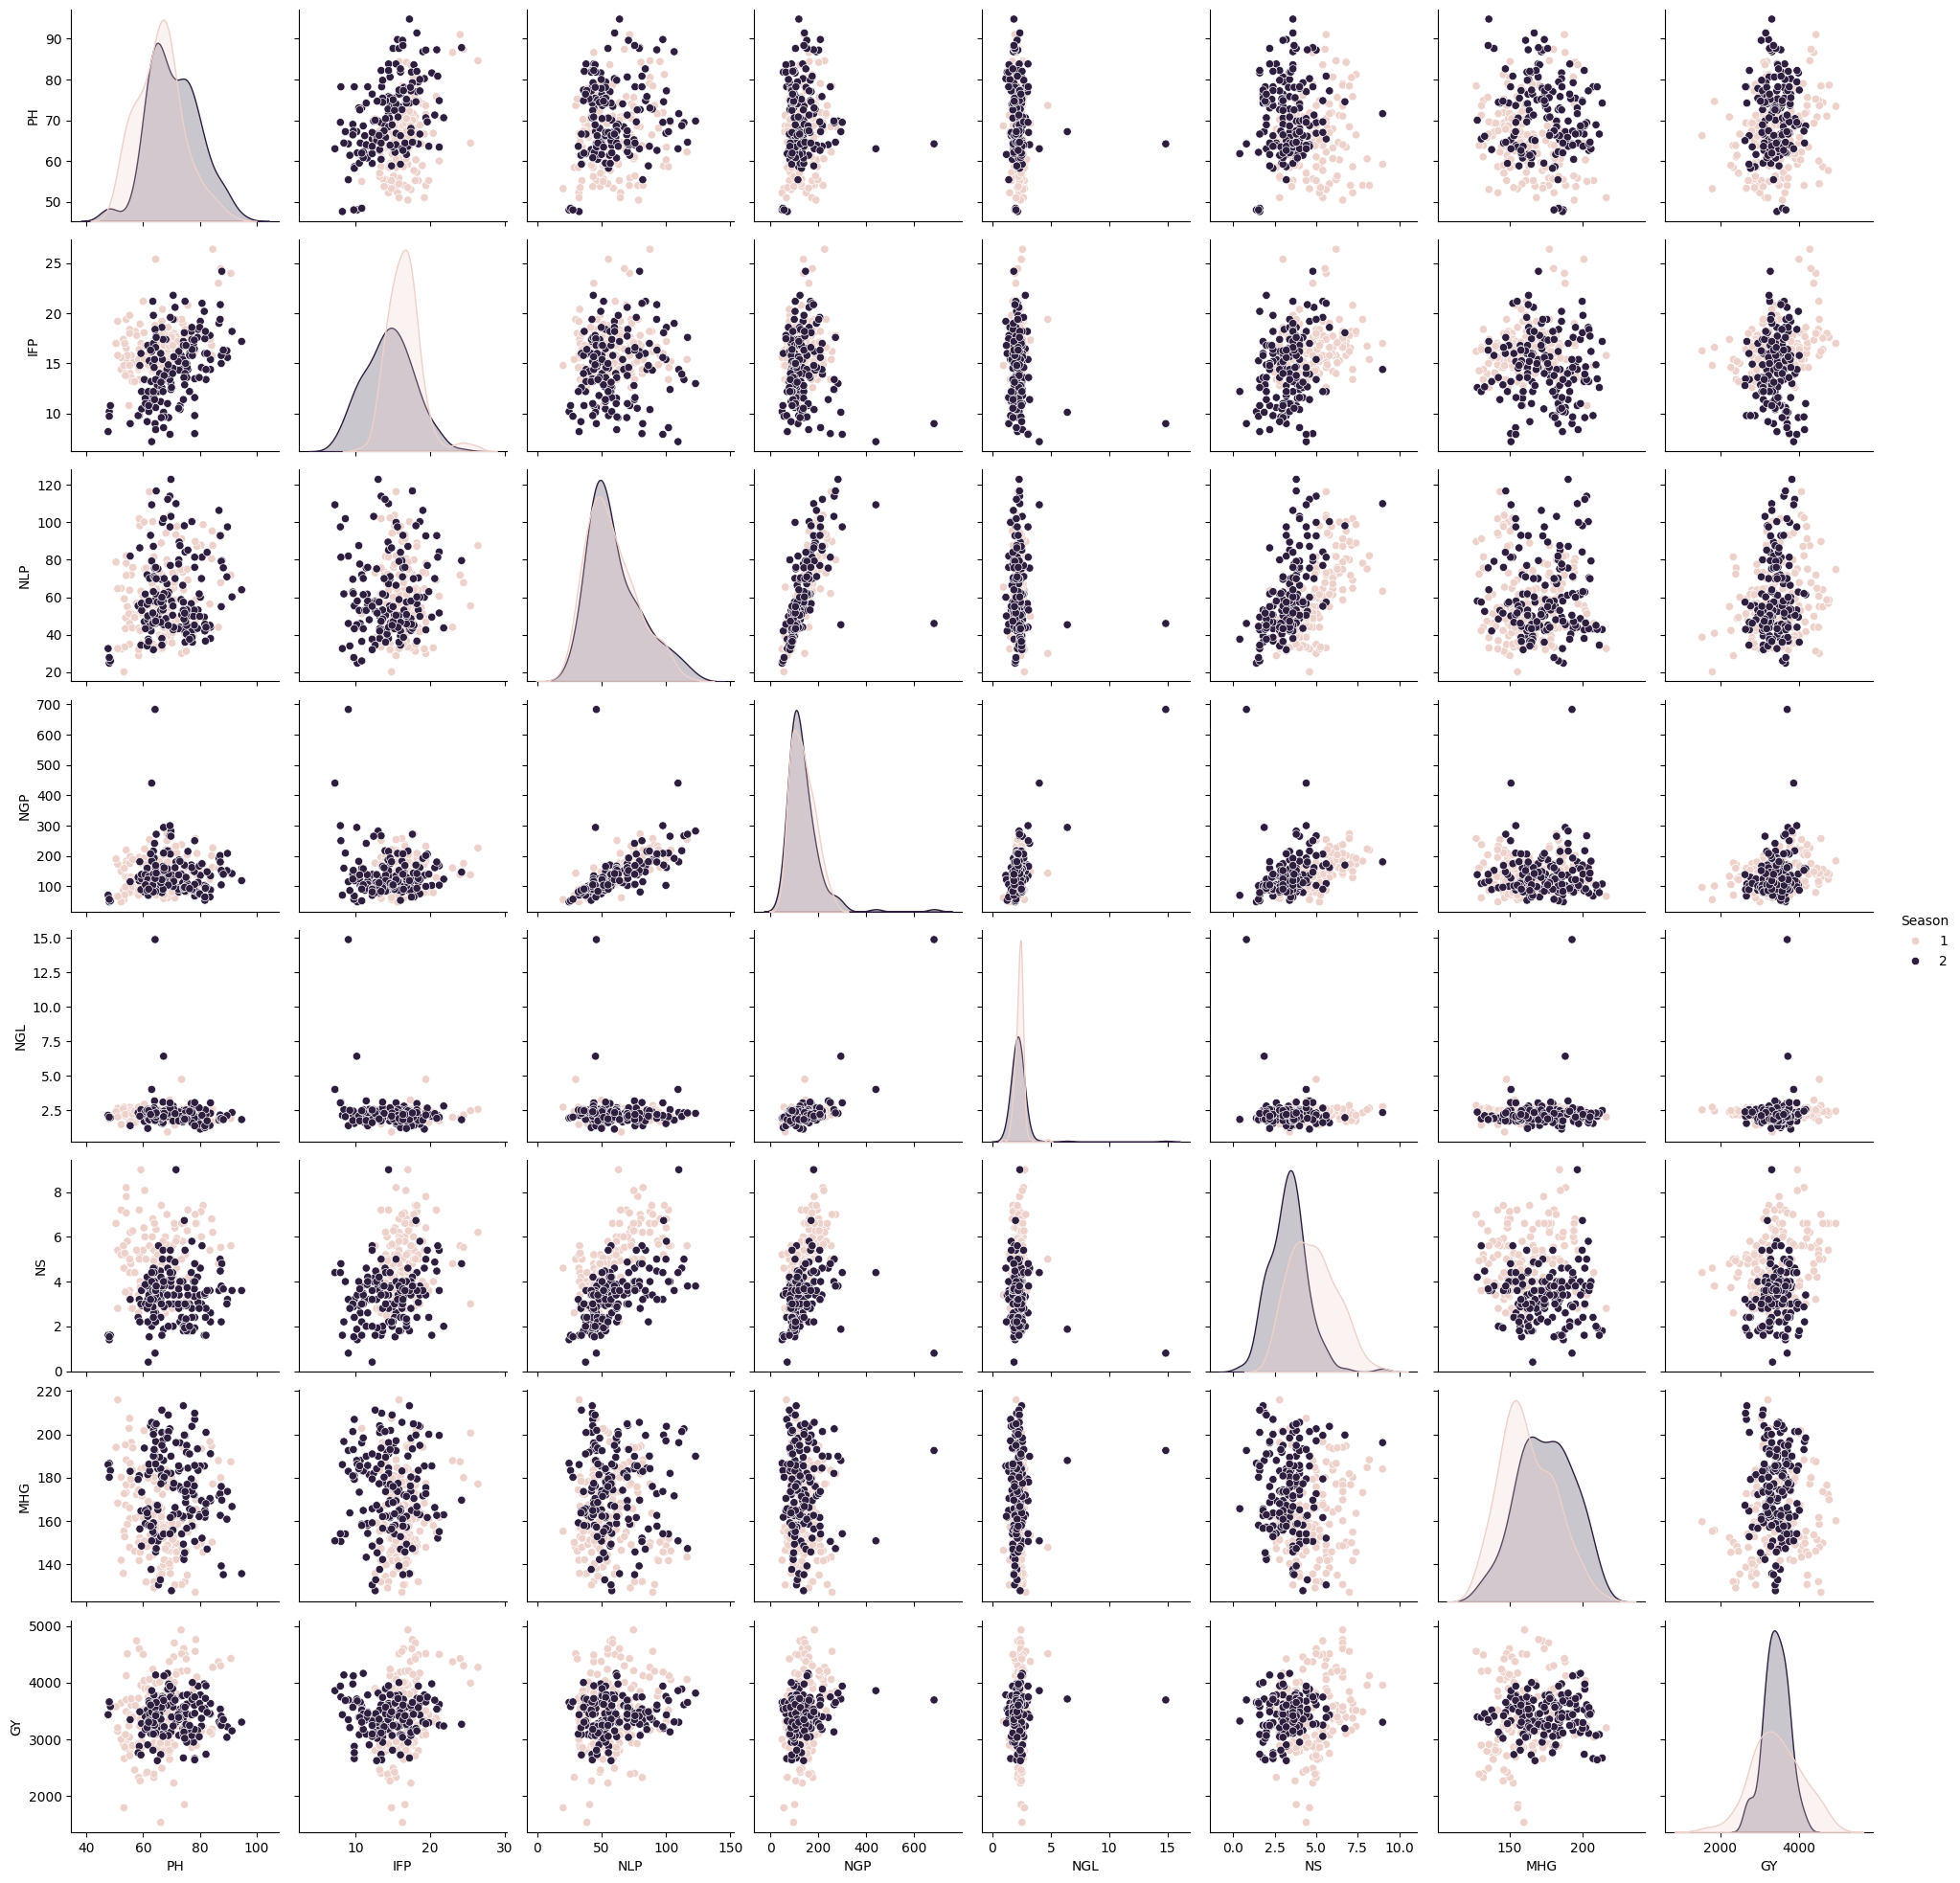

In [ ]:
# Filter season 1 and 2
df_filtered = data[data['Season'].isin([1, 2])]

# Create the pair plot
sns.pairplot(df_filtered, hue='Season')

# Show the plot
plt.show()

In [32]:
# Read the new dataset
data.head()

,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,1,NEO 760 CE,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,1,NEO 760 CE,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,1,NEO 760 CE,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,1,NEO 760 CE,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,1,MANU IPRO,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [33]:
# Transform the 'Season' column to logistic
data['Season'] = data['Season'].map({1: 0, 2: 1})
# Check the unique values in the 'Season' column
unique_season_values = data['Season'].unique()
print(f"Unique values in the 'Season' column: {unique_season_values}")
# Check the distribution of the 'Season' column
season_counts = data['Season'].value_counts()
print(f"Distribution of the 'Season' column:\n{season_counts}")
# Check the shape of the dataset
data.shape
print(f"Shape of the dataset: {data.shape}")
# Check the first few rows of the dataset
data.head()



Unique values in the 'Season' column: [0 1]
Distribution of the 'Season' column:
Season
0    160
1    160
Name: count, dtype: int64
Shape of the dataset: (320, 10)


,Season,Cultivar,PH,IFP,NLP,NGP,NGL,NS,MHG,GY
0,0,NEO 760 CE,58.80,15.20,98.2,177.80,1.81,5.2,152.20,3232.82
1,0,NEO 760 CE,58.60,13.40,102.0,195.00,1.85,7.2,141.69,3517.36
2,0,NEO 760 CE,63.40,17.20,100.4,203.00,2.02,6.8,148.81,3391.46
3,0,NEO 760 CE,60.27,15.27,100.2,191.93,1.89,6.4,148.50,3312.58
4,0,MANU IPRO,81.20,18.00,98.8,173.00,1.75,7.4,145.59,3230.99


In [38]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=['float64', 'int64']).drop(columns=['Season']))  # Exclude 'Season' but keep it in the dataset

# Check the first few rows of the dataset
data_scaled = pd.DataFrame(data_scaled, columns=data.drop(columns=['Cultivar', 'Season']).columns)  # Use correct column names
data_scaled['Season'] = data['Season']
data_scaled.head()

,PH,IFP,NLP,NGP,NGL,NS,MHG,GY,Season
0,-1.071845,-0.087761,1.951992,0.707189,-0.573250,0.766421,-0.822782,-0.369828,0
1,-1.094206,-0.683872,2.141643,0.991957,-0.525563,2.124909,-1.359147,0.196740,0
2,-0.557544,0.574585,2.061790,1.124408,-0.322893,1.853211,-0.995786,-0.053948,0
3,-0.907493,-0.064579,2.051808,0.941129,-0.477876,1.581514,-1.011607,-0.211012,0
4,1.432575,0.839523,1.981937,0.627719,-0.644781,2.260758,-1.160115,-0.373472,0


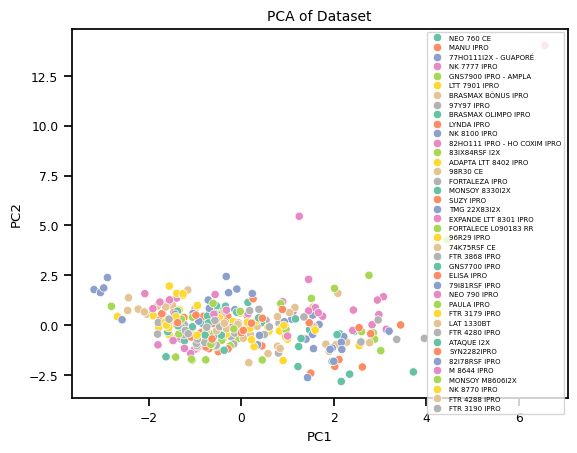

In [39]:

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cultivar'] = data['Cultivar']  # Add the 'Cultivar' column back for labeling

# Visualize the PCA results
sns.set_context("notebook", font_scale=0.8)  # Adjust font scale for smaller labels
scatter_plot = sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cultivar', palette='Set2')
plt.title('PCA of Dataset', fontsize=10)  # Adjust title font size
plt.legend(fontsize=5)  # Adjust legend font size
plt.show()

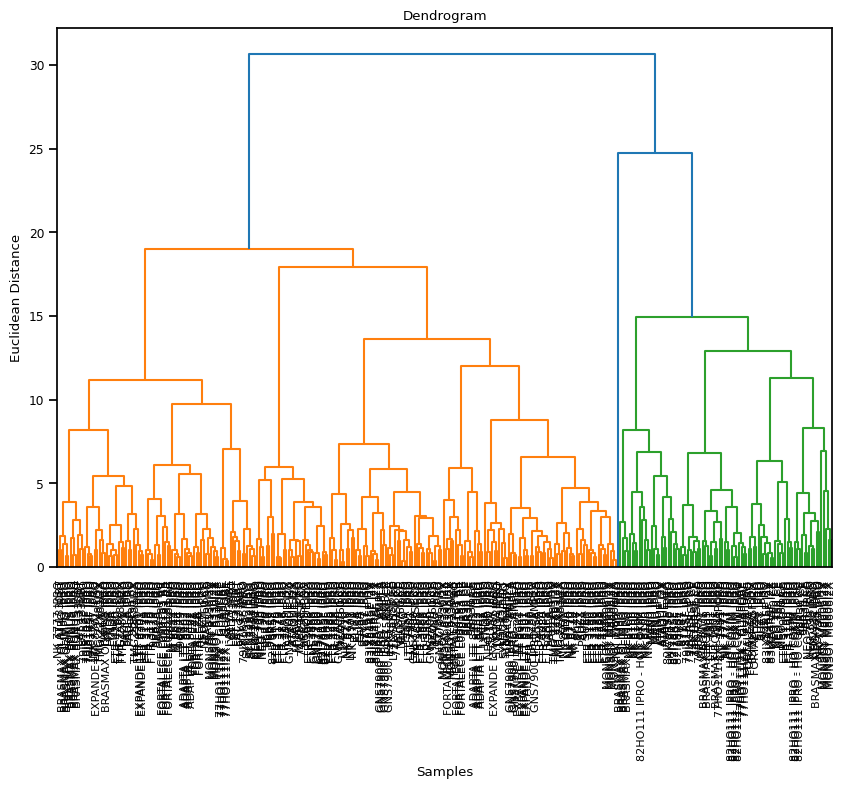

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame and you want to cluster all numeric columns
# Drop non-numeric columns (e.g., 'Cultivar') if necessary
data_numeric = data_scaled.select_dtypes(include=['float64', 'int64'])

# Perform hierarchical clustering
linked = linkage(data_numeric, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=data['Cultivar'].values, leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

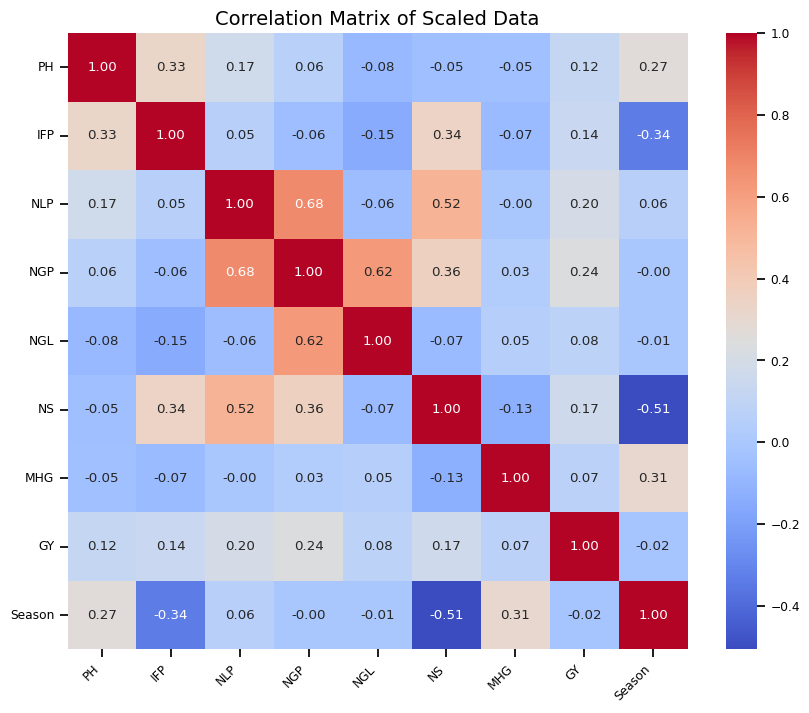

In [44]:
# Compute the correlation matrix
correlation_matrix = data_scaled.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add title and labels
plt.title("Correlation Matrix of Scaled Data", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()